In [2]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
from dateutil import parser

from sklearn.preprocessing import StandardScaler

from data_loader import SleepTimeSeriesDataset

Load the file containing training time_series.

In [3]:
df = pd.read_parquet("train_series.parquet")

Load the individual events in the training timeseries.

In [4]:
events_df = pd.read_csv("train_events.csv")

Explore the time series DataFrame.

In [27]:
df.head(10)

series_id  step                 timestamp  anglez    enmo
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215
5  038441c925bb     5  2018-08-14T15:30:25-0400  2.6367  0.0217
6  038441c925bb     6  2018-08-14T15:30:30-0400  2.6367  0.0217
7  038441c925bb     7  2018-08-14T15:30:35-0400  2.6367  0.0218
8  038441c925bb     8  2018-08-14T15:30:40-0400  2.7980  0.0223
9  038441c925bb     9  2018-08-14T15:30:45-0400  3.0847  0.0217

In [46]:
series_grouped = df.groupby("series_id")
series_lengths = series_grouped.size()
unique_ids = series_grouped["series_id"].unique()
print(f"Time series count: {len(unique_ids)}")

Time series count: 277


Histogram of lengths of all series.

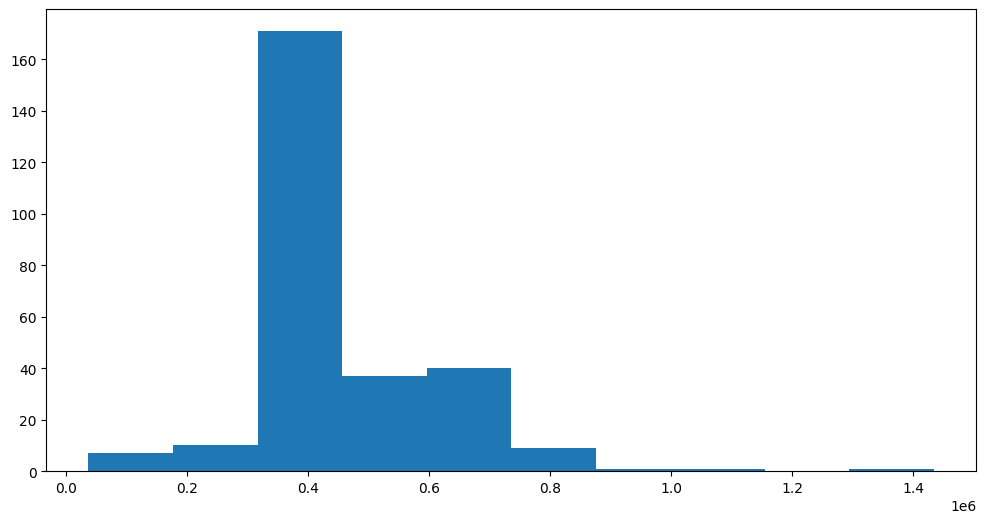

In [9]:
plt.figure(figsize=(12,6))
_ = plt.hist(series_lengths)

Plot some time series.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


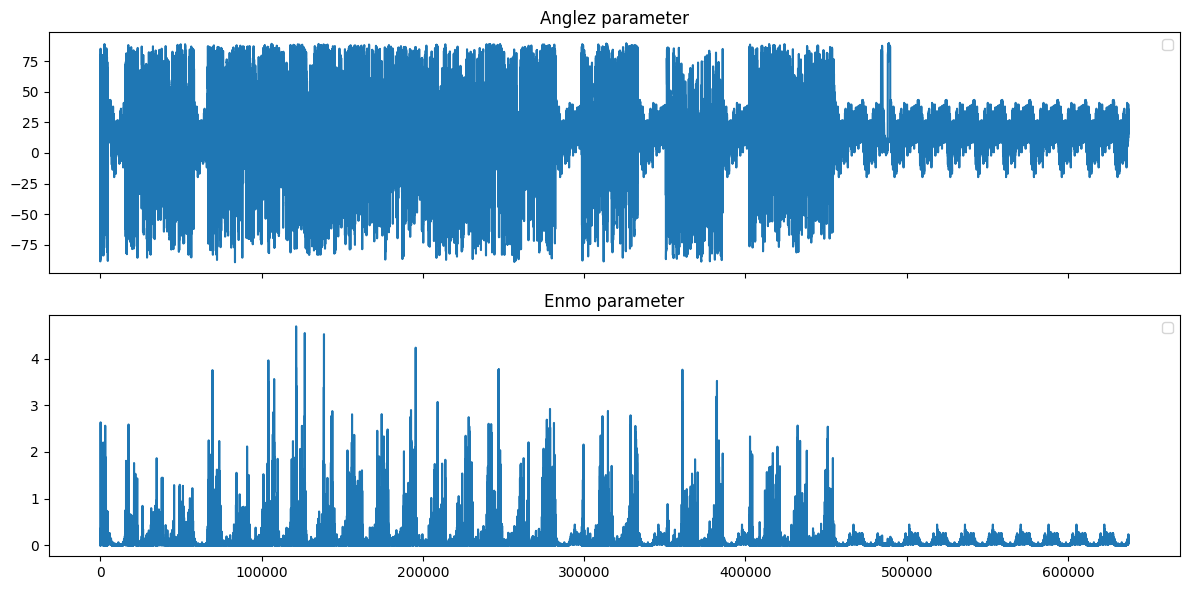

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.plot(ts[:,0])
ax1.set_title("Anglez parameter")
ax1.legend()

ax2.plot(ts[:,1])
ax2.set_title('Enmo parameter')
ax2.legend()

plt.tight_layout()
plt.show()

anglez parameter:

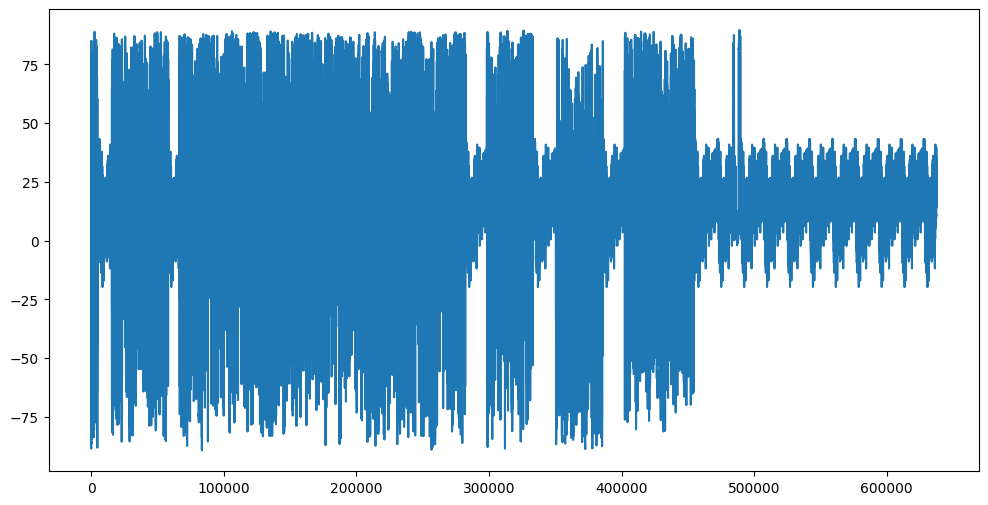

In [22]:
ts_id = unique_ids[3][0]
ts = df[df["series_id"] == unique_ids[3][0]][["anglez", "enmo"]].to_numpy()
plt.figure(figsize=(12,6))
_ = plt.plot(ts[:,0])

enmo parameter:

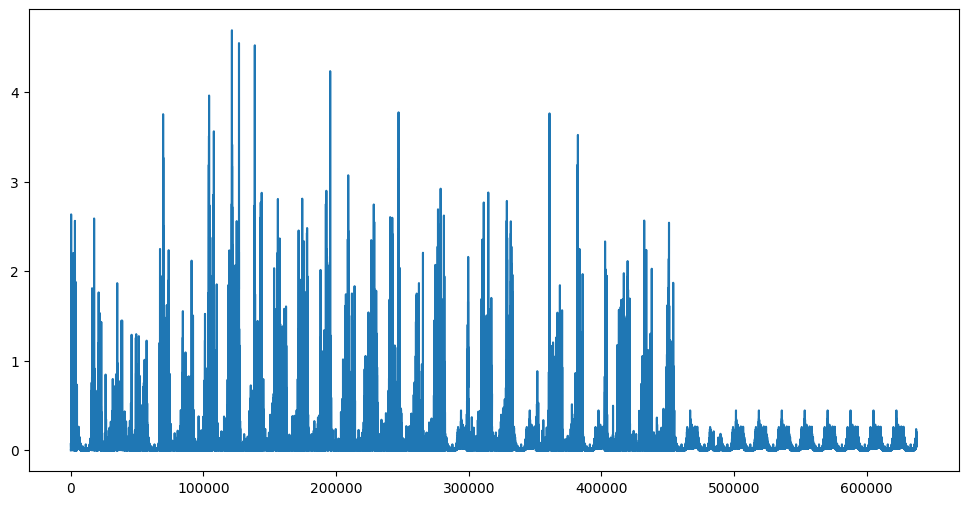

In [23]:
plt.figure(figsize=(12,6))
_ = plt.plot(ts[:,1])

Explore the target events DataFrame.

In [26]:
events_df.dropna(inplace=True)
events_df.head(10)

series_id  night   event     step                 timestamp
0   038441c925bb      1   onset   4992.0  2018-08-14T22:26:00-0400
1   038441c925bb      1  wakeup  10932.0  2018-08-15T06:41:00-0400
2   038441c925bb      2   onset  20244.0  2018-08-15T19:37:00-0400
3   038441c925bb      2  wakeup  27492.0  2018-08-16T05:41:00-0400
4   038441c925bb      3   onset  39996.0  2018-08-16T23:03:00-0400
5   038441c925bb      3  wakeup  44400.0  2018-08-17T05:10:00-0400
6   038441c925bb      4   onset  57240.0  2018-08-17T23:00:00-0400
7   038441c925bb      4  wakeup  62856.0  2018-08-18T06:48:00-0400
10  038441c925bb      6   onset  91296.0  2018-08-19T22:18:00-0400
11  038441c925bb      6  wakeup  97860.0  2018-08-20T07:25:00-0400

Plot the sleep segments with one of the signals.

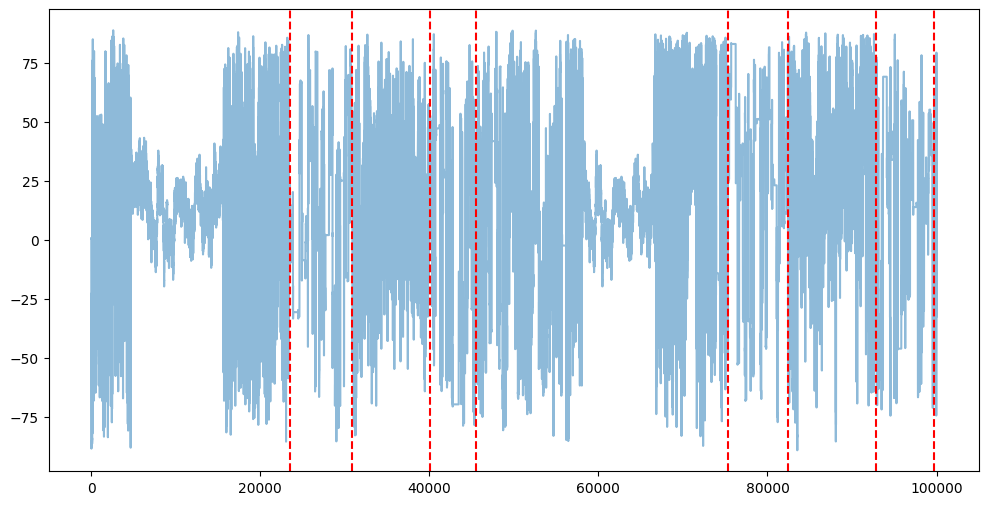

In [41]:
changepoints = events_df[events_df["series_id"] == ts_id]["step"].to_numpy()
plt.figure(figsize=(12, 6))
up_to = 100000
plt.plot(ts[:up_to,0], alpha=.5)
for index in changepoints:
    if index < up_to:
        plt.axvline(x=index, color='r', linestyle='--')